In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/lereveamericain/Data/03_processed")
career = pd.read_csv('data_processed.csv')

In [8]:
career.sample(5)

,Unnamed: 0,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,JobTitle,ManageStaff,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam,DatabaseServers,Education,Gender
1005,1735,2019,2019-01-04 10:06:24.611,130000.0,United States,49506,Microsoft SQL Server,20,DBA,No,17,2,5,100,Bachelors (4 years),Female
566,1065,2020,2019-12-11 19:26:17.379,112000.0,United States,55113,Microsoft SQL Server,15,DBA,No,10,4,1,24,Not Asked,Male
3285,5661,2018,2017-12-11 12:14:23.615,150000.0,United States,30004,Microsoft SQL Server,18,Developer: T-SQL,No,2,Not Asked,1,8,Masters,Male
2673,4619,2018,2017-12-18 11:03:43.588,117000.0,United States,2000,PostgreSQL,1,Data Scientist,No,3,Not Asked,None,2,Bachelors (4 years),Male
826,1484,2020,2019-12-11 11:35:31.029,60000.0,United States,23454,Microsoft SQL Server,1,Developer: T-SQL,Yes,1,1,2,5,Not Asked,Male


####
#### with describe, we can see some basic statistical details like percentile, mean, std,percentiles etc...
#### to answer to the question :
#### mean of salary is106520.31 and the median is 103000.0

In [9]:
career.describe()

,Unnamed: 0,Survey Year,SalaryUSD,YearsWithThisDatabase,YearsWithThisTypeOfJob,DatabaseServers
count,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000
mean,4427.982868,2018.129548,106520.308425,17.655630,7.856593,169.803465
std,2522.354787,1.103938,35111.994653,421.603465,6.837463,1833.686260
min,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000
25%,2213.000000,2017.000000,85000.000000,6.000000,3.000000,6.000000
50%,4512.000000,2018.000000,103000.000000,10.000000,5.000000,20.000000
75%,6559.500000,2019.000000,125000.000000,17.000000,10.000000,60.000000
max,8626.000000,2020.000000,500000.000000,30331.000000,45.000000,100000.000000


In [10]:
print( "mean salary : ", round(career.SalaryUSD.mean(),2))
print("salary median : ", round(career.SalaryUSD.median(),2))

mean salary :  106520.31
salary median :  103000.0


#### pivot table on entire table and SalaryUSD

In [11]:
table = pd.pivot_table(data=career,index=['SalaryUSD'])
table

,DatabaseServers,Survey Year,Unnamed: 0,YearsWithThisDatabase,YearsWithThisTypeOfJob
SalaryUSD,,,,,
0.00,4.0,2020.0,1062.0,4.0,4.0
92.27,20.0,2018.0,5367.0,16.0,16.0
125.00,100.0,2020.0,984.0,20.0,24.0
144.00,15.0,2020.0,745.0,20.0,35.0
150.00,200.0,2020.0,1311.0,24.0,10.0
...,...,...,...,...,...
345000.00,16.0,2018.0,3014.0,19.0,5.0
350000.00,6.0,2020.0,1490.0,12.0,40.0
400000.00,5.0,2017.0,6283.0,13.0,10.0


####  boxploting

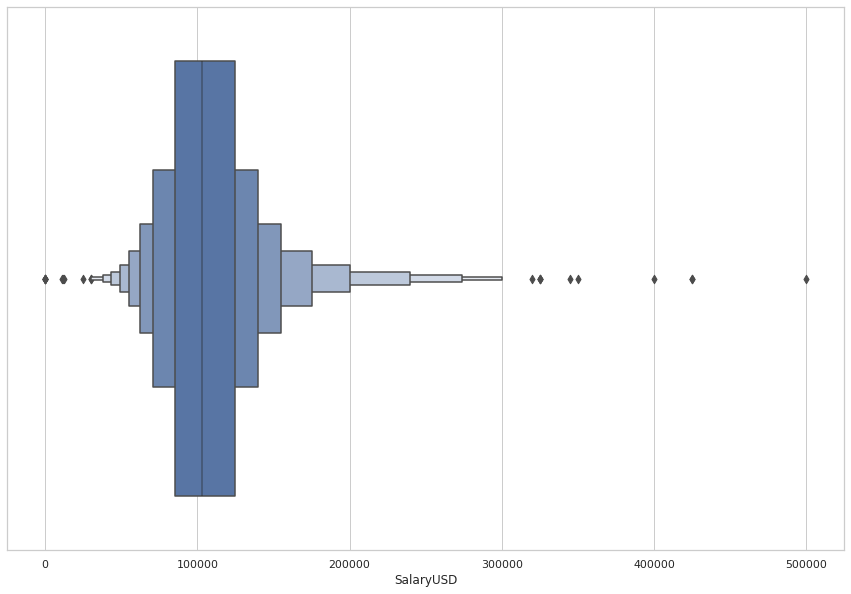

In [12]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")

ax = sns.boxenplot(x=career["SalaryUSD"],k_depth='proportion')

####  to know the 10 deciles:

In [13]:
career_salary =career["SalaryUSD"]
deciles = np.around(np.arange(start=.1, stop=.91, step=.1),1)
career_salary.quantile(deciles)

0.1     68000.0
0.2     80000.0
0.3     89851.2
0.4     95920.0
0.5    103000.0
0.6    110000.0
0.7    120000.0
0.8    130000.0
0.9    144904.0
Name: SalaryUSD, dtype: float64

#### visualisation of the deciles:

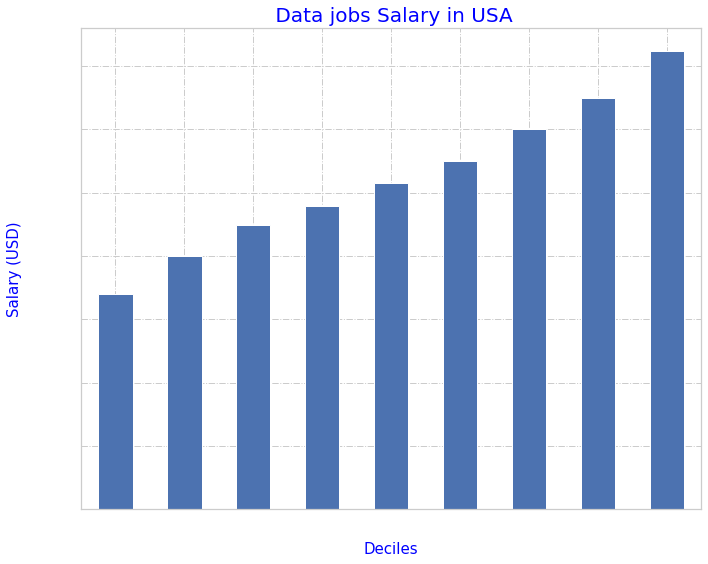

In [19]:
plt.figure(figsize = (10,8))

ax0 = career_salary.quantile(deciles).plot(kind='bar', title="title")
ax0.grid(True, linestyle='-.')
ax0.tick_params(labelcolor='white', labelsize='medium', width=3)
axes = plt.gca()
ax0.set_title(' Data jobs Salary in USA',fontsize = 20,color= 'blue')
ax0.set_xlabel('Deciles',fontsize = 15)
ax0.set_ylabel('Salary (USD)', fontsize = 15)
axes.xaxis.label.set_color("blue")
axes.yaxis.label.set_color("blue")

plt.tight_layout()
plt.show()

#### plot salary/job title

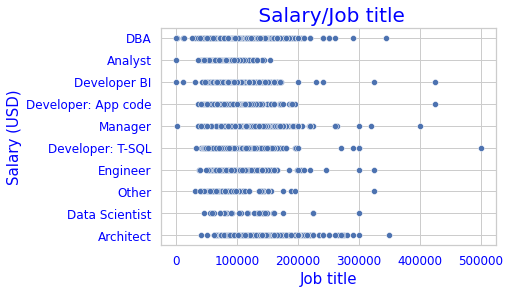

In [15]:
axd = sns.scatterplot(data = career, y= career.JobTitle, x=career.SalaryUSD)
axd.tick_params(labelcolor='blue', labelsize='medium', width=3)
axes = plt.gca()
axd.set_title(' Salary/Job title',fontsize = 20,color= 'blue')
axd.set_xlabel('Job title',fontsize = 15)
axd.set_ylabel('Salary (USD)', fontsize = 15)
axes.xaxis.label.set_color("blue")
axes.yaxis.label.set_color("blue")
plt.show()


#### Cross tab to obtain the frequency off job titles

In [16]:
t = pd.crosstab(career.JobTitle, "freq")

#### reset th index to use the label of column JobTitle for the pie chart

In [17]:
t.reset_index(inplace=True)

#### figuring the pie chart with the frequency of the job title

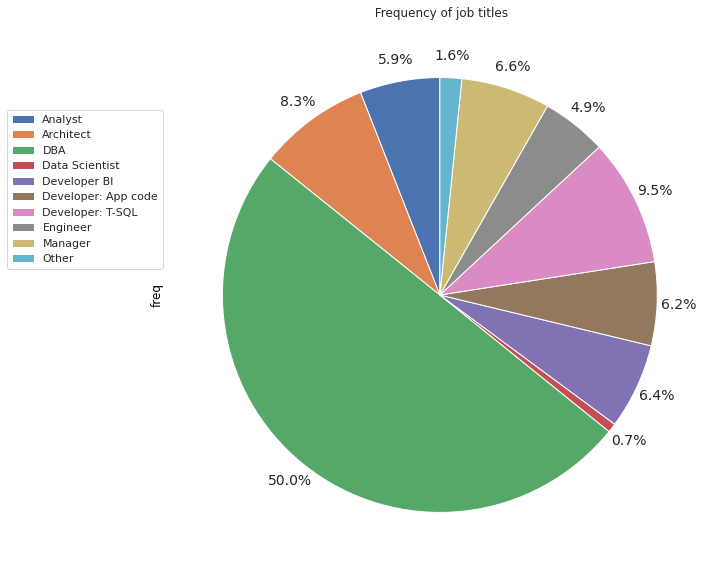

In [18]:
fig=plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# plot chart
ax1 = plt.subplot(111, aspect='equal')
t.plot(kind='pie', y = 'freq', ax=ax1, pctdistance = 1.1,autopct='%1.1f%%',
 startangle=90, shadow=False, labels=None, legend = False, fontsize=14)
plt.legend(labels=t['JobTitle'],bbox_to_anchor=(0,0.85))
axes = plt.gca()
axes.set_title(' Frequency of job titles')
#ax.set_title(' Frequency of job titles',fontsize = 20,color= 'Black')

axes.xaxis.label.set_color("black")
axes.yaxis.label.set_color("black")
